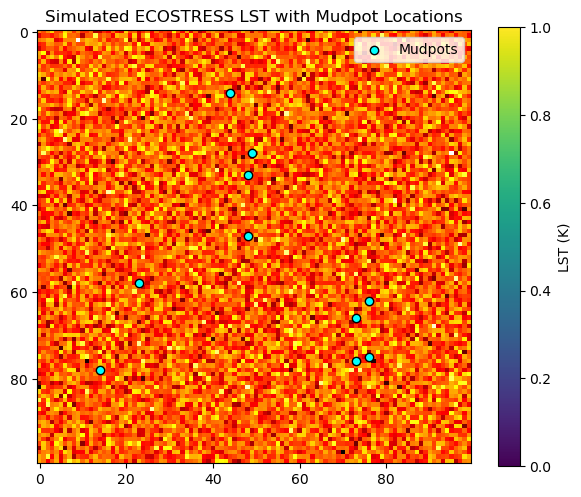

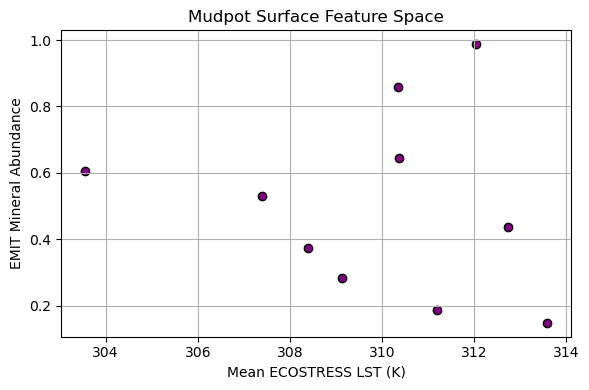

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# --- Simulate ECOSTRESS LST and EMIT mineral rasters ---
np.random.seed(42)
width, height = 100, 100
lst_raster = np.random.normal(loc=310, scale=3, size=(height, width))  # ECOSTRESS LST (K)
emit_raster = np.random.uniform(0, 1, size=(height, width))  # Mineral abundance (e.g., alunite)

# --- Simulate mudpot locations ---
n_mudpots = 10
mudpot_coords = np.random.randint(10, 90, size=(n_mudpots, 2))  # Avoid edge cases

mudpots = pd.DataFrame(mudpot_coords, columns=["x", "y"])
mudpots["LST"] = [lst_raster[y, x] for x, y in mudpot_coords]
mudpots["Mineral"] = [emit_raster[y, x] for x, y in mudpot_coords]

# --- Plot raster + mudpots ---
plt.figure(figsize=(6,5))
plt.imshow(lst_raster, cmap='hot')
plt.scatter(mudpots["x"], mudpots["y"], color='cyan', edgecolor='k', label="Mudpots")
plt.title("Simulated ECOSTRESS LST with Mudpot Locations")
plt.colorbar(label="LST (K)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Scatter plot of LST vs. Mineral abundance ---
plt.figure(figsize=(6,4))
plt.scatter(mudpots["LST"], mudpots["Mineral"], color='purple', edgecolor='k')
plt.xlabel("Mean ECOSTRESS LST (K)")
plt.ylabel("EMIT Mineral Abundance")
plt.title("Mudpot Surface Feature Space")
plt.grid(True)
plt.tight_layout()
plt.show()
